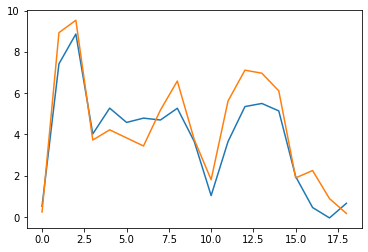

In [1]:
import torch
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt

node=2000
spectral=1
input_range=1
learning_rate=0.8
bias=0.02
beta=3e-05
###adjacency matrix##
A=torch.randn(node,node,dtype=torch.float64)
A1,A2=torch.eig(A,eigenvectors=True)
eig_A=A1
max_eig_A=torch.max(eig_A)
adj_matrix=(spectral/max_eig_A)*A

###input_matrix###
input_weight=torch.FloatTensor(node,3).uniform_(-input_range,input_range)
input_weight=input_weight.type(torch.float64)

###reservoir nodes###
nodes=torch.ones(node,1,dtype=torch.float64)

###bias###
B=torch.ones(node,1,dtype=torch.float64)

###load data###
a=genfromtxt('/home/ktylinux/Downloads/data1.csv',delimiter=',')
fx=a[:,1]
fy=a[:,2]
fz=a[:,3]
ff=a[:,0]

x=torch.as_tensor(fx, dtype=torch.float64)
y=torch.as_tensor(fy, dtype=torch.float64)
z=torch.as_tensor(fz, dtype=torch.float64)
f=torch.as_tensor(ff, dtype=torch.float64)
#x=torch.transpose(x,1,0)
#y=torch.transpose(y,1,0)
#z=torch.transpose(z,1,0)
#f=torch.transpose(f,1,0)
###list to matrix###
F=[y[0:99]]
F=torch.stack(F)

###state nodes###
N=[]
for k in range(99):
    tt=torch.tensor([[x[k],y[k],z[k]]])
    tt=torch.transpose(tt,0,1)
    nodes = (1-learning_rate)*nodes+learning_rate*(torch.tanh(torch.mm(adj_matrix,nodes)+torch.mm(input_weight,tt)+bias*B))
    N.append(nodes)
N=torch.stack(N)

###sum of state nodes###
sum_N=torch.zeros(node,1,dtype=torch.float64)
for i in range(79):
    sum_N=sum_N+N[i,:,:]


###matrix R and S###

R=N[0:79,:,:]-(1/80)*sum_N
R=R[:,:,0]
S=F[:,0:79]-(1/80)*(torch.ones(1,1,dtype=torch.float64)*torch.sum(F[0:79]))
S=S.t()

###output weight###
output_weight=(torch.mm(torch.mm(S.t(),R),torch.inverse(torch.mm(R.t(),R)+beta*torch.eye(node,dtype=torch.float64))))

###constant###
constant=-(torch.mm(output_weight,(1/80)*sum_N)-(1/80)*torch.ones(1,1,dtype=torch.float64)*torch.sum(F[0:79]))

###prediction###
prediction=[]
for i in range(19):
    predict_out=torch.mm(output_weight,N[80+i])+constant
    prediction.append(predict_out)

prediction=torch.stack(prediction)

###plot###
XX=[]
for i in range(19):
    XX.append(i)
plt.plot(XX,prediction[:,0])
plt.plot(XX,F[0,80:99])

#error=prediction[:,0]-F[0,80:99].t()
#plt.plot(XX,error)